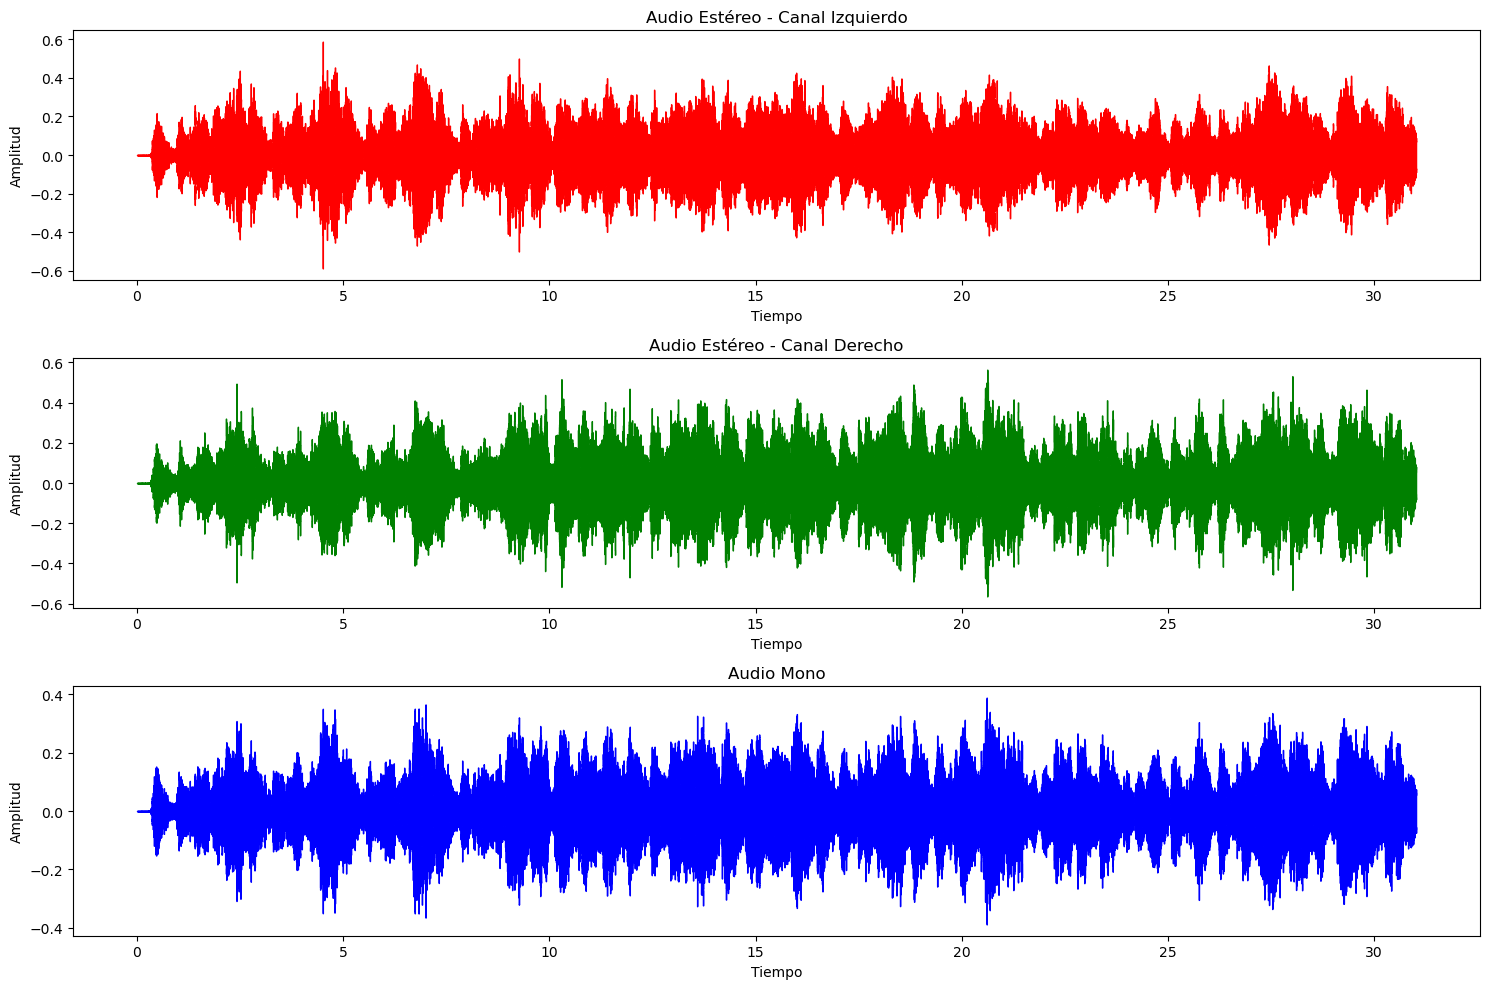


CONCEPTOS TÉCNICOS DE AUDIO DIGITAL:

1. Frecuencia de muestreo:
   - Número de muestras capturadas por segundo.
   - Determina la calidad y rango de frecuencias reproducibles.

2. Aliasing:
   - Distorsión que ocurre cuando la frecuencia de muestreo es insuficiente.
   
3. Profundidad de bits:
   - Resolución de la amplitud de cada muestra.
   
4. Ancho de banda:
   - Rango de frecuencias que puede transmitir una señal.
   - Determina el espectro de frecuencias reproducibles.

5. Tasa de bits:
   - Cantidad de datos procesados por unidad de tiempo.
   - Medida en kbps (kilobits por segundo).



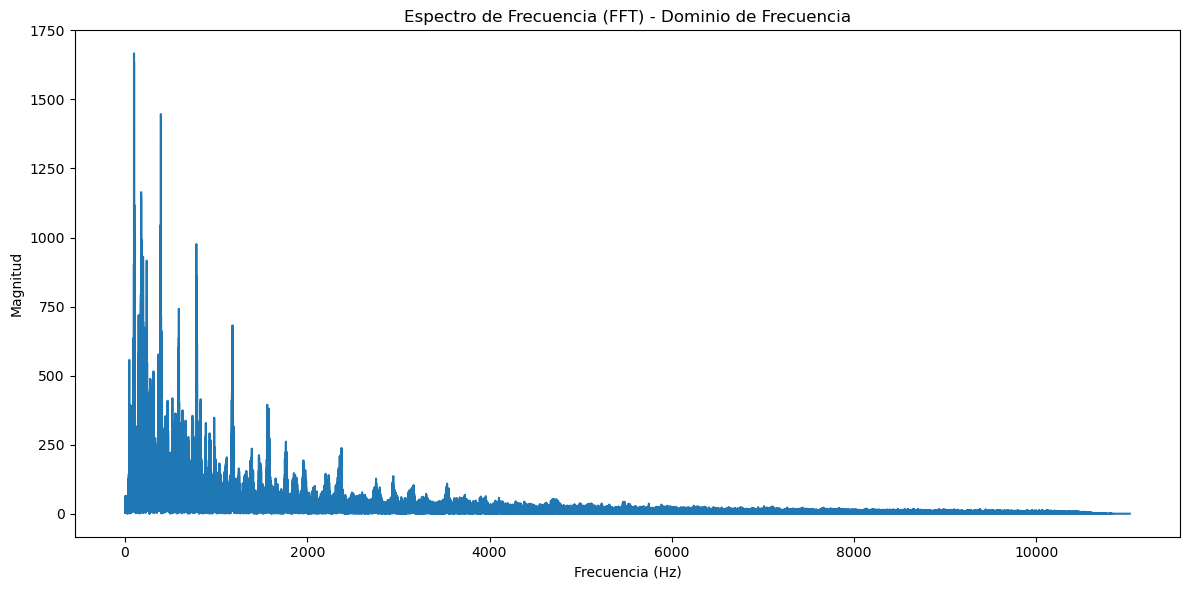

Frecuencia de corte (epsilon = 0.5): 0.028826278634369373


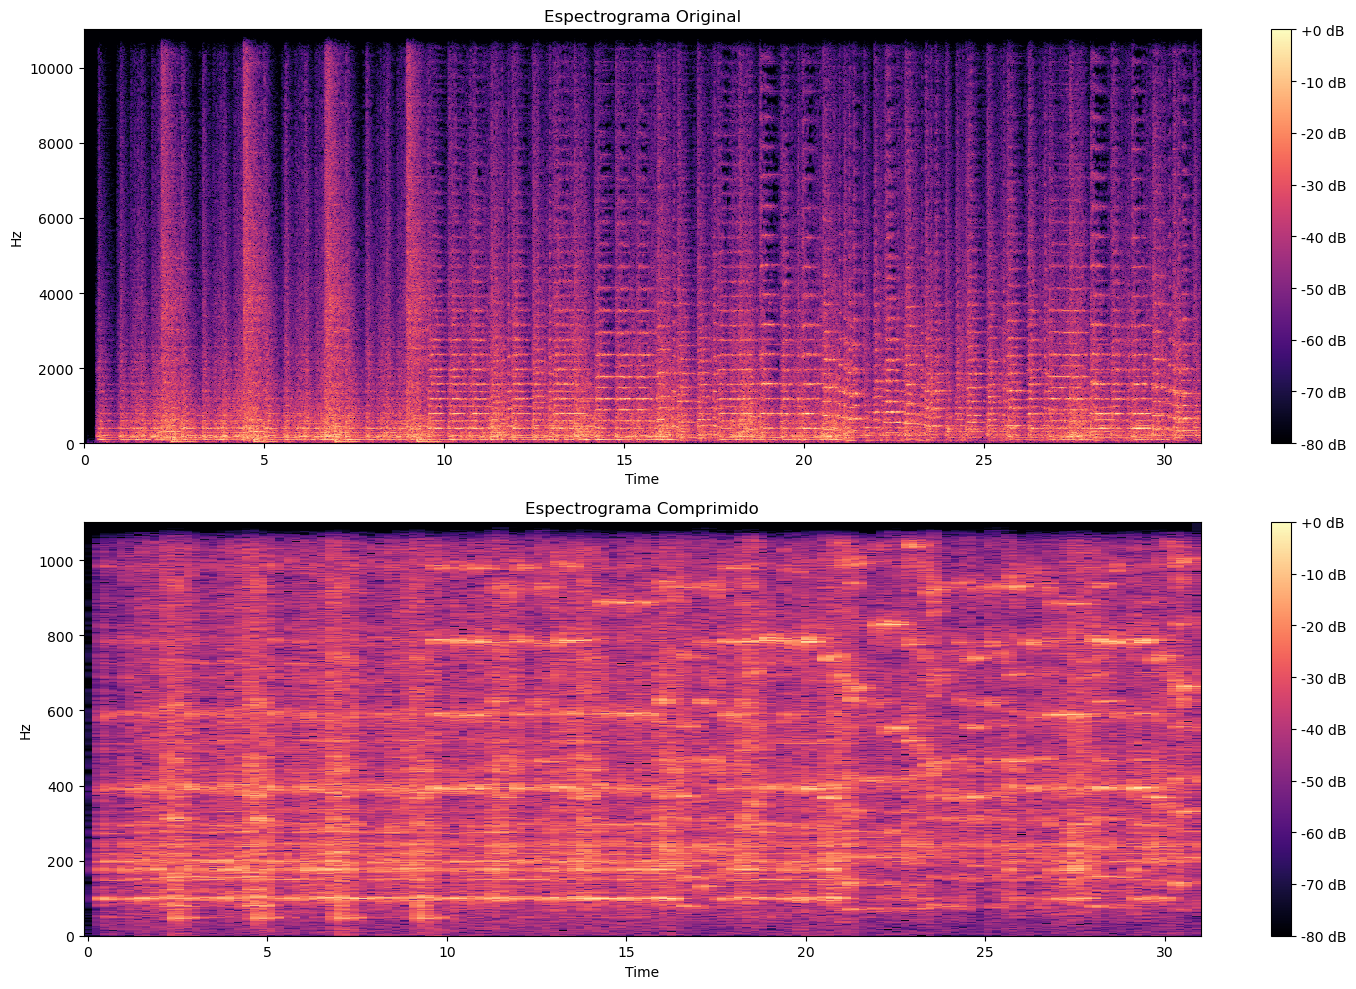


DIFERENCIAS EN ESPECTROGRAMAS:
- El espectrograma comprimido pierde resolución y detalle.
- Se reducen las frecuencias altas.
- La representación del sonido es menos precisa.
- Pérdida de información por el downsampling.

Tamaño audio original: 2.74 MB
Tamaño audio comprimido: 0.27 MB

Audio Original:



Audio Comprimido:


In [8]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import soundfile as sf

# 1. Cargar audio (mono y estéreo)
audio_path = 'star_wars_imperial_march.wav'
audio_stereo, sr_stereo = librosa.load(audio_path, mono=False)  # Cargar en estéreo
audio_mono, sr_mono = librosa.load(audio_path, mono=True)  # Cargar en mono

# 2. Mostrar gráficas en dominio del tiempo
plt.figure(figsize=(15, 10))

# Gráfica audio estéreo - canal izquierdo
plt.subplot(3, 1, 1)
plt.title('Audio Estéreo - Canal Izquierdo')
librosa.display.waveshow(audio_stereo[0], sr=sr_stereo, color='red')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

# Gráfica audio estéreo - canal derecho
plt.subplot(3, 1, 2)
plt.title('Audio Estéreo - Canal Derecho')
librosa.display.waveshow(audio_stereo[1], sr=sr_stereo, color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

# Gráfica audio mono
plt.subplot(3, 1, 3)
plt.title('Audio Mono')
librosa.display.waveshow(audio_mono, sr=sr_mono, color='blue')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

# 3. Explicación de conceptos técnicos
print("""
CONCEPTOS TÉCNICOS DE AUDIO DIGITAL:

1. Frecuencia de muestreo:
   - Número de muestras capturadas por segundo.
   - Determina la calidad y rango de frecuencias reproducibles.

2. Aliasing:
   - Distorsión que ocurre cuando la frecuencia de muestreo es insuficiente.
   
3. Profundidad de bits:
   - Resolución de la amplitud de cada muestra.
   
4. Ancho de banda:
   - Rango de frecuencias que puede transmitir una señal.
   - Determina el espectro de frecuencias reproducibles.

5. Tasa de bits:
   - Cantidad de datos procesados por unidad de tiempo.
   - Medida en kbps (kilobits por segundo).
""")

# 4. Transformada Rápida de Fourier (FFT) para audio mono
fft_audio = np.fft.fft(audio_mono)
frecuencias = np.fft.fftfreq(len(audio_mono), 1/sr_mono)

plt.figure(figsize=(12, 6))
plt.title('Espectro de Frecuencia (FFT) - Dominio de Frecuencia')
plt.plot(frecuencias[:len(frecuencias)//2], np.abs(fft_audio)[:len(fft_audio)//2])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.tight_layout()
plt.show()

# 5. Cálculo de energía del espectrograma y frecuencia de corte
spectrograma = librosa.stft(audio_mono)
energia_spectrograma = np.abs(spectrograma)**2

# Elegir un epsilon (umbral de energía)
epsilon = 0.5  # Puedes experimentar con diferentes valores
frecuencia_corte = np.percentile(energia_spectrograma, 50)
print(f"Frecuencia de corte (epsilon = {epsilon}): {frecuencia_corte}")

# 6. Compresión por downsampling
def compress_audio(audio, sr, min_length=1000):
    max_compression = len(audio) // min_length
    factor = max(2, min(10, max_compression))
    audio_compressed = librosa.resample(audio, orig_sr=sr, target_sr=sr // factor)
    return audio_compressed, sr // factor

# Compress audio
audio_comprimido, sr_comprimido = compress_audio(audio_mono, sr_mono)

# 7. Comparación de espectrogramas
plt.figure(figsize=(15, 10))

def safe_specshow(audio, sr, title):
    n_fft = min(2048, len(audio))
    n_fft = max(2, n_fft if n_fft % 2 == 0 else n_fft - 1)
    stft = librosa.stft(audio, n_fft=n_fft)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft), ref=np.max), sr=sr, x_axis='time', y_axis='hz')
    plt.title(title)
    plt.colorbar(format='%+2.0f dB')

# Espectrograma original
plt.subplot(2, 1, 1)
safe_specshow(audio_mono, sr_mono, 'Espectrograma Original')

# Espectrograma comprimido
plt.subplot(2, 1, 2)
safe_specshow(audio_comprimido, sr_comprimido, 'Espectrograma Comprimido')

plt.tight_layout()
plt.show()

print("""
DIFERENCIAS EN ESPECTROGRAMAS:
- El espectrograma comprimido pierde resolución y detalle.
- Se reducen las frecuencias altas.
- La representación del sonido es menos precisa.
- Pérdida de información por el downsampling.
""")

# 8. Tamaño de archivos
print(f"Tamaño audio original: {audio_mono.nbytes / 1e6:.2f} MB")
print(f"Tamaño audio comprimido: {audio_comprimido.nbytes / 1e6:.2f} MB")

# 9. Widgets de reproducción
print("\nAudio Original:")
display(Audio(audio_mono, rate=sr_mono))
print("\nAudio Comprimido:")
display(Audio(audio_comprimido, rate=sr_comprimido))

# Guardar archivos de audio
sf.write('/tmp/audio_original.wav', audio_mono, sr_mono)
sf.write('/tmp/audio_comprimido.wav', audio_comprimido, sr_comprimido)


In [9]:
!pwd

/home/raul/SistemasM
